#### Exchange Rate Data using API

In [56]:
import requests

from datetime import datetime

today= datetime.today().strftime('%Y-%m-%d')
# Set API endpoint and parameters
url = "https://api.apilayer.com/exchangerates_data/timeseries?start_date=2023-04-01&end_date={}".format(today)
params = {"symbols":["AUD,CAD,CHF,CNH,EUR,GBP,HKD,JPY,NZD,USD"], "base": "USD"}

# Set payload and headers
payload = {}
headers= {
  "apikey": "IUf5PDU7VWUEUPeYjxP2rUV9F8MCKGSo"
}

# Send HTTP GET request to API endpoint
response = requests.request("GET", url, headers=headers,params=params, data = payload)

try:
    response.raise_for_status() # Raise an exception if the response status code is not 200
    data = response.json()
    print(data)
except requests.exceptions.HTTPError as err:
    print(f"HTTP error occurred: {err}")
except ValueError:
    print("Error: Response is not in JSON format.")
except Exception as err:
    print(f"Error occurred: {err}")

2023-04-20
https://api.apilayer.com/exchangerates_data/timeseries?start_date=2023-04-01&end_date=2023-04-20
{'success': True, 'timeseries': True, 'start_date': '2023-04-01', 'end_date': '2023-04-20', 'base': 'USD', 'rates': {'2023-04-01': {'AUD': 1.49525, 'CAD': 1.35265, 'CHF': 0.914864, 'EUR': 0.919904, 'GBP': 0.810045, 'HKD': 7.84995, 'JPY': 132.77504, 'NZD': 1.5977, 'USD': 1}, '2023-04-02': {'AUD': 1.500826, 'CAD': 1.34985, 'CHF': 0.91751, 'EUR': 0.92544, 'GBP': 0.813715, 'HKD': 7.84975, 'JPY': 133.296012, 'NZD': 1.605385, 'USD': 1}, '2023-04-03': {'AUD': 1.473101, 'CAD': 1.343435, 'CHF': 0.912775, 'EUR': 0.91655, 'GBP': 0.80499, 'HKD': 7.846935, 'JPY': 132.304501, 'NZD': 1.58681, 'USD': 1}, '2023-04-04': {'AUD': 1.479785, 'CAD': 1.343945, 'CHF': 0.905601, 'EUR': 0.91255, 'GBP': 0.80015, 'HKD': 7.84935, 'JPY': 131.488023, 'NZD': 1.58365, 'USD': 1}, '2023-04-05': {'AUD': 1.488798, 'CAD': 1.345465, 'CHF': 0.90637, 'EUR': 0.91709, 'GBP': 0.8024, 'HKD': 7.849815, 'JPY': 130.931995, 'NZD

In [96]:
import pandas as pd

def json_to_dataframe(json_data):
    try:
        # Flatten JSON data into a DataFrame
        df = pd.json_normalize(json_data).T.iloc[4:].reset_index()
        # Split index column into separate columns
        df= df['index'].str.rsplit('.', 2, expand=True).add_prefix('Col_').join(df)
        df2=df[["Col_1","Col_2",0]]
        # Rename columns
        df2=df2.set_axis(['Date', 'Currency_From',"Currency_To_Value"], axis='columns', inplace=False)
        df2=df2[1:]
        
        df2["Rate type"]= "Spot rate"
        df2["Curency_From_Value"]= 1
        df2["Curency_To"]= "USD"
        # Reorder columns
        df2 = df2[["Rate type", "Date", "Currency_From","Curency_From_Value","Curency_To","Currency_To_Value"]]

        return df2
    except Exception as e:
        print(f"Error occurred: {e}")
        return None

In [97]:
output= json_to_dataframe(data)

In [98]:
with pd.ExcelWriter("Exchange_Rates.xlsx") as writer:
    output.to_excel(writer,sheet_name="Export_check",index=False)

In [80]:
df=df.set_axis(['Date', 'Currency_From',"Currency_To_Value"], axis='columns', inplace=False)
df=df[1:]
df

,Date,Currency_From,Currency_To_Value
1,2023-04-01,AUD,1.49525
2,2023-04-01,CAD,1.35265
3,2023-04-01,CHF,0.914864
4,2023-04-01,EUR,0.919904
5,2023-04-01,GBP,0.810045
...,...,...,...
158,2023-04-18,GBP,0.804505
159,2023-04-18,HKD,7.849755
160,2023-04-18,JPY,134.042965
161,2023-04-18,NZD,1.611095


In [82]:
gl_np=pd.read_excel("/Users/shruthiravishankar/Downloads/Howden_CompanyXYZ_2021_Data.xlsx",sheet_name="GL-np")
ma_np=pd.read_excel("/Users/shruthiravishankar/Downloads/Howden_CompanyXYZ_2021_Data.xlsx",sheet_name="MA-np")


In [92]:
gl_np_stat=gl_np.iloc[3:16,:14]
gl_np_stat.columns=gl_np_stat. iloc[0] 
gl_np_stat=gl_np_stat[1:]
gl_np_stat

3,U/W year,Gross written premium,12,24.0,36.0,48.0,60.0,72.0,84.0,96.0,108.0,120.0,132.0,144.0
4,2010,674.489785,0.064168,0.139191,0.195611,0.255805,0.384002,0.532382,0.565280,0.603158,0.614125,0.638146,0.654034,0.660818
5,2011,690.0993,0.043751,0.072734,0.154699,0.251445,0.337517,0.420212,0.485671,0.557106,0.615345,0.650320,0.668502,NaN
6,2012,711.114154,0.01795,0.090635,0.161217,0.244294,0.367047,0.434271,0.532942,0.558977,0.581891,0.589011,NaN,NaN
7,2013,735.794679,0.038538,0.115854,0.209903,0.271201,0.338911,0.378295,0.425544,0.460831,0.479195,NaN,NaN,NaN
8,2014,677.676303,0.046458,0.139500,0.241596,0.331309,0.394565,0.458589,0.505375,0.538423,NaN,NaN,NaN,NaN
9,2015,717.600859,0.046791,0.171044,0.293231,0.395287,0.474507,0.532606,0.574231,NaN,NaN,NaN,NaN,NaN
10,2016,705.659112,0.054658,0.165187,0.281047,0.407247,0.538303,0.642667,NaN,NaN,NaN,NaN,NaN,NaN
11,2017,773.543068,0.036079,0.134503,0.315816,0.421862,0.532815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2018,821.253039,0.042096,0.150827,0.270252,0.356296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2019,878.981409,0.031017,0.127719,0.226146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
gl_np_stat=gl_np_stat.melt(id_vars=['U/W year','Gross written premium'],var_name = 'Month', value_name = 'LossIncurredRatio')
gl_np_stat["LineOfBusiness"] =  "General liability non-proportional"
gl_np_stat

,U/W year,Gross written premium,Month,LossIncurredRatio,LineOfBusiness
0,2010,674.489785,12,0.064168,General liability non-proportional
1,2011,690.0993,12,0.043751,General liability non-proportional
2,2012,711.114154,12,0.01795,General liability non-proportional
3,2013,735.794679,12,0.038538,General liability non-proportional
4,2014,677.676303,12,0.046458,General liability non-proportional
...,...,...,...,...,...
139,2017,773.543068,144.0,NaN,General liability non-proportional
140,2018,821.253039,144.0,NaN,General liability non-proportional
141,2019,878.981409,144.0,NaN,General liability non-proportional
142,2020,1099.908139,144.0,NaN,General liability non-proportional


In [100]:
ma_np_stat=ma_np.iloc[3:16,:14]
ma_np_stat.columns=ma_np_stat. iloc[0] 
ma_np_stat=ma_np_stat[1:]
ma_np_stat

3,U/W year,Gross written premium,12,24.0,36.0,48.0,60.0,72.0,84.0,96.0,108.0,120.0,132.0,144.0
4,2010,312.440053,0.103923,0.237895,0.347226,0.414127,0.465081,0.485117,0.486760,0.514892,0.525407,0.530517,0.532518,0.536385
5,2011,354.171456,0.14394,0.317842,0.405868,0.474611,0.523701,0.545387,0.572050,0.597444,0.604885,0.604498,0.611247,NaN
6,2012,315.522667,0.122069,0.283649,0.355437,0.436142,0.475403,0.560551,0.581212,0.578108,0.577860,0.586365,NaN,NaN
7,2013,390.526091,0.435568,0.605497,0.711175,0.758531,0.893613,0.936277,0.900405,0.884730,0.896793,NaN,NaN,NaN
8,2014,372.810014,0.161779,0.338658,0.421875,0.612624,0.652225,0.635571,0.632767,0.645919,NaN,NaN,NaN,NaN
9,2015,380.744334,0.138446,0.329265,0.630771,0.701382,0.680964,0.672138,0.682644,NaN,NaN,NaN,NaN,NaN
10,2016,388.286269,0.126773,0.453744,0.574528,0.602167,0.655824,0.688314,NaN,NaN,NaN,NaN,NaN,NaN
11,2017,421.732421,0.199319,0.486561,0.567582,0.615283,0.685385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2018,475.674554,0.126804,0.360256,0.513203,0.609910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2019,565.75191,0.135383,0.343652,0.472556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
ma_np_stat=ma_np_stat.melt(id_vars=['U/W year','Gross written premium'],var_name = 'Month', value_name = 'LossIncurredRatio')
ma_np_stat["LineOfBusiness"] =  "Motor/Accident non-proportional"
ma_np_stat

,U/W year,Gross written premium,Month,LossIncurredRatio,LineOfBusiness
0,2010,312.440053,12,0.103923,Motor/Accident non-proportional
1,2011,354.171456,12,0.14394,Motor/Accident non-proportional
2,2012,315.522667,12,0.122069,Motor/Accident non-proportional
3,2013,390.526091,12,0.435568,Motor/Accident non-proportional
4,2014,372.810014,12,0.161779,Motor/Accident non-proportional
...,...,...,...,...,...
139,2017,421.732421,144.0,NaN,Motor/Accident non-proportional
140,2018,475.674554,144.0,NaN,Motor/Accident non-proportional
141,2019,565.75191,144.0,NaN,Motor/Accident non-proportional
142,2020,684.697301,144.0,NaN,Motor/Accident non-proportional


In [102]:
df3 = gl_np_stat.append(ma_np_stat)
df3

<ipython-input-102-2fa86b59dba0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = gl_np_stat.append(ma_np_stat)


,U/W year,Gross written premium,Month,LossIncurredRatio,LineOfBusiness
0,2010,674.489785,12,0.064168,General liability non-proportional
1,2011,690.0993,12,0.043751,General liability non-proportional
2,2012,711.114154,12,0.01795,General liability non-proportional
3,2013,735.794679,12,0.038538,General liability non-proportional
4,2014,677.676303,12,0.046458,General liability non-proportional
...,...,...,...,...,...
139,2017,421.732421,144.0,NaN,Motor/Accident non-proportional
140,2018,475.674554,144.0,NaN,Motor/Accident non-proportional
141,2019,565.75191,144.0,NaN,Motor/Accident non-proportional
142,2020,684.697301,144.0,NaN,Motor/Accident non-proportional


In [126]:
gl_np

gl_np_booked=gl_np.iloc[3:16,:]
gl_np_booked = gl_np_booked.drop(gl_np_booked.iloc[:,2:15], inplace=False, axis=1)

gl_np_booked.columns=gl_np_booked. iloc[0] 
gl_np_booked=gl_np_booked[1:]

gl_np_booked["LineOfBusiness"] =  "General liability non-proportional"
gl_np_booked["Ultimate loss ratio"]= gl_np_booked["Paid losses"] + gl_np_booked["Case reserves"] + gl_np_booked["IBNR"]

gl_np_booked

3,U/W year,Gross written premium,Earned premium,Paid losses,Case reserves,IBNR,LineOfBusiness,Ultimate loss ratio
4,2010,674.489785,673.624711,0.520012,0.144561,0.24385,General liability non-proportional,0.908423
5,2011,690.0993,689.271147,0.493775,0.175993,0.211692,General liability non-proportional,0.88146
6,2012,711.114154,706.157802,0.391095,0.189389,0.309272,General liability non-proportional,0.889755
7,2013,735.794679,728.051908,0.363427,0.12538,0.315433,General liability non-proportional,0.80424
8,2014,677.676303,674.164989,0.408618,0.135727,0.359257,General liability non-proportional,0.903602
9,2015,717.600859,713.104391,0.444498,0.146213,0.518836,General liability non-proportional,1.109547
10,2016,705.659112,701.177591,0.317211,0.333903,0.504905,General liability non-proportional,1.15602
11,2017,773.543068,767.39395,0.291307,0.250428,0.50112,General liability non-proportional,1.042855
12,2018,821.253039,813.929538,0.180632,0.186222,0.58114,General liability non-proportional,0.947993
13,2019,878.981409,867.132458,0.079086,0.157451,0.752435,General liability non-proportional,0.988973


In [125]:
ma_np_booked=ma_np.iloc[3:16,:]
ma_np_booked = ma_np_booked.drop(ma_np_booked.iloc[:,2:15], inplace=False, axis=1)

ma_np_booked.columns=ma_np_booked. iloc[0] 
ma_np_booked=ma_np_booked[1:]

ma_np_booked["LineOfBusiness"] =  "Motor/Accident non-proportional"
ma_np_booked["Ultimate loss ratio"]= ma_np_booked["Paid losses"] + ma_np_booked["Case reserves"] + ma_np_booked["IBNR"]
ma_np_booked

3,U/W year,Gross written premium,Earned premium,Paid losses,Case reserves,IBNR,LineOfBusiness,Ultimate loss ratio
4,2010,312.440053,312.440053,0.383064,0.1544,0.107239,Motor/Accident non-proportional,0.644703
5,2011,354.171456,354.16849,0.469637,0.140808,0.116795,Motor/Accident non-proportional,0.727241
6,2012,315.522667,315.522171,0.332235,0.252803,0.172945,Motor/Accident non-proportional,0.757983
7,2013,390.526091,390.526091,0.70883,0.187745,0.196754,Motor/Accident non-proportional,1.093329
8,2014,372.810014,372.810014,0.431268,0.215185,0.242899,Motor/Accident non-proportional,0.889351
9,2015,380.744334,380.744334,0.380261,0.304722,0.361217,Motor/Accident non-proportional,1.046201
10,2016,388.286269,388.286269,0.324975,0.363264,0.400231,Motor/Accident non-proportional,1.088469
11,2017,421.732421,422.170291,0.31796,0.366791,0.439403,Motor/Accident non-proportional,1.124155
12,2018,475.674554,475.547655,0.245565,0.364842,0.480071,Motor/Accident non-proportional,1.090479
13,2019,565.75191,565.147667,0.190384,0.282721,0.548281,Motor/Accident non-proportional,1.021386


In [155]:
ma_np_graph=ma_np_booked.melt(id_vars=['U/W year','Gross written premium','Earned premium','Ultimate loss ratio','LineOfBusiness'],var_name = 'Type', value_name = 'value')


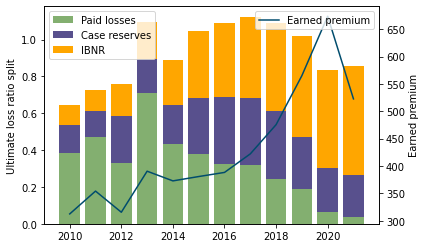

In [224]:
def create_plot(x, y1, y2, y3,y4):

    fig = plt.figure()
    ax1 = fig.gca()
    ax2 = ax1.twinx()


    ax1.bar(x, y1,color='#83af70')
    ax1.bar(x, y2, bottom=y1,color='#58508d')
    ax1.bar(x, y3, bottom=y1+y2,color='#ffa600')
    ax1.set_ylabel("Ultimate loss ratio split")
    ax1.legend(["Paid losses", "Case reserves", "IBNR"],loc="upper left")

    ax2.plot(x, y4,color='#004c6d')
    ax2.set_ylabel('Earned premium')
    ax2.legend(["Earned premium"], loc="upper right")
    return fig



fig= create_plot(ma_np_booked["U/W year"] , ma_np_booked["Paid losses"],ma_np_booked["Case reserves"],ma_np_booked["IBNR"], ma_np_booked["Earned premium"])
plt.show()

In [11]:

    
import mysql.connector

cnx = mysql.connector.connect(user='root', password='Shravi1996!',
                              host='127.0.0.1',port='3306',auth_plugin='mysql_native_password',
                              database='new_database')

SyntaxError: invalid syntax (<ipython-input-11-2c69048d925a>, line 1)

In [23]:

import pymysql

connection = pymysql.connect(host="localhost",
                             user="root",
                             password="Shravi1996!",
                             database="new_database")

try:
    cursor = connection.cursor()
    cursor.execute("select database();")
    db = cursor.fetchone()
    print("You're connected to database: ", db)
except pymysql.Error as e:
    print("Error while connecting to MySQL", e)
finally:
    cursor.close()
    connection.close()
    print("MySQL connection is closed")

You're connected to database:  ('new_database',)
MySQL connection is closed


In [1]:
import pandas as pd
#if we have a csv file
df = pd.read_excel('//Users/shruthiravishankar/Downloads/dbo_mod_policy_v2.xlsx')
#if we have an excel file
df

,AccountID,PolicyID,PolicyRef,Insured (slip),Inception Date,Expiry Date,Currency,Signed Line,Limit,Excess
0,1,1,1,1,2022-12-15,2023-12-15,USD,0.013330,150000000,100000000
1,2,2,2,2,2022-12-31,2023-12-31,USD,0.005000,175000000,0
2,3,3,3,3,2022-12-31,2023-12-31,USD,0.050200,25000000,0
3,4,4,4,4,2022-12-31,2023-12-31,USD,0.004922,100000000,0
4,5,6,6,5,2023-01-01,2024-01-01,USD,0.020000,95000000,10000000
5,6,7,7,6,2023-01-01,2024-01-01,USD,0.035000,25000000,0
6,7,8,8,7,2022-12-31,2023-12-31,USD,0.040000,25000000,0
7,8,9,9,8,2022-12-31,2023-12-31,USD,0.013000,10000000,0
8,9,10,10,9,2023-01-01,2024-01-01,USD,0.013330,150000000,100000000
9,10,12,12,10,2023-01-01,2024-01-01,USD,0.015000,65000000,60000000


In [10]:
print(df.dtypes)


AccountID                  int64
PolicyID                   int64
PolicyRef                  int64
Insured (slip)             int64
Inception Date    datetime64[ns]
Expiry Date       datetime64[ns]
Currency                  object
Signed Line              float64
Limit                      int64
Excess                     int64
dtype: object


In [30]:
from sqlalchemy import create_engine

engine = create_engine("mysql+pymysql://" + "root" + ":" + "Shravi1996!" + "@" + "127.0.0.1" + ":" + "3306" + "/" + "new_database" + "?" + "charset=utf8mb4")

In [31]:
conn = engine.connect()



In [35]:
df.to_sql("dbo_mod_policy_v2", conn, if_exists="append")



17

In [12]:
df_2 = pd.read_excel('/Users/shruthiravishankar/Downloads/dbo_mod_location (1).xlsx')
df_2

,LocID,AccountID,InsuredName,UniqueID,LocNum,LocName,StreetAddress,City,County,Statecode,...,NumBldgs,LocCurr,Total Insured Values,Building,Contents,Inventory,Business Interruption,Earthquake,Tornado/hail,Wind
0,2262,1,NaN,1,1,NaN,Industriegebiet Sued B 30,Alzenau,Aschaffenburg Landkreis,NaN,...,1,USD,11383999.23,10333999.80,0.0,0.0,1049999.43,1,1,1
1,845,1,NaN,10,10,NaN,6600 Governors Lake Pkwy,Norcross,Gwinnett County,GA,...,1,USD,22586958.67,20588871.43,0.0,0.0,1998087.24,1,1,1
2,4412,1,NaN,100,100,NaN,1375 Highlands Ridge,Smyrna,Cobb County,GA,...,1,USD,4523964.00,4069578.66,0.0,0.0,454385.34,1,1,1
3,4458,1,NaN,1000,1000,NaN,898 Linxian Road,Shanghai,Shanghai Districts,Shanghai,...,1,USD,4410622.65,4095634.58,0.0,0.0,314988.07,1,1,1
4,1773,1,NaN,1001,1001,NaN,898 Linxian Road,Shanghai,Shanghai Districts,Shanghai,...,1,USD,14151930.32,13194051.21,0.0,0.0,957879.11,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29210,28173,9,NaN,995,995,NaN,4655 VINELAND ROAD,ORLANDO,ORANGE COUNTY,FL,...,1,USD,15000000.00,15000000.00,0.0,0.0,0.00,1,1,1
29211,28174,9,NaN,996,996,NaN,751 WINYAH DRIVE,ORLANDO,ORANGE COUNTY,FL,...,1,USD,1.00,1.00,0.0,0.0,0.00,1,1,1
29212,28175,9,NaN,997,997,NaN,3000 MEDICAL PARK DR,TAMPA,HILLSBOROUGH COUNTY,FL,...,1,USD,1.00,1.00,0.0,0.0,0.00,1,1,1
29213,28176,9,NaN,998,998,NaN,2400 NORTH ORANGE AVENUE,ORLANDO,ORANGE COUNTY,FL,...,1,USD,1.00,1.00,0.0,0.0,0.00,1,1,1


In [32]:
cols = ['Building', 'Contents', 'Business Interruption']
df_2[cols] = df_2[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [43]:
import numpy as np
df_2[cols]=df_2[cols].replace('',0,inplace = True)

<ipython-input-43-a7886f3a757b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[cols]=df_2[cols].replace('',0,inplace = True)


In [44]:
df_2["TIV_calculated"] = df_2["Building"] + df_2["Contents"] + df_2["Inventory"] + df_2["Business Interruption"]

In [45]:
df_2

,LocID,AccountID,InsuredName,UniqueID,LocNum,LocName,StreetAddress,City,County,Statecode,...,LocCurr,Total Insured Values,Building,Contents,Inventory,Business Interruption,Earthquake,Tornado/hail,Wind,TIV_calculated
0,2262,1,NaN,1,1,NaN,Industriegebiet Sued B 30,Alzenau,Aschaffenburg Landkreis,NaN,...,USD,11383999.23,None,None,0.0,None,1,1,1,NaN
1,845,1,NaN,10,10,NaN,6600 Governors Lake Pkwy,Norcross,Gwinnett County,GA,...,USD,22586958.67,None,None,0.0,None,1,1,1,NaN
2,4412,1,NaN,100,100,NaN,1375 Highlands Ridge,Smyrna,Cobb County,GA,...,USD,4523964.00,None,None,0.0,None,1,1,1,NaN
3,4458,1,NaN,1000,1000,NaN,898 Linxian Road,Shanghai,Shanghai Districts,Shanghai,...,USD,4410622.65,None,None,0.0,None,1,1,1,NaN
4,1773,1,NaN,1001,1001,NaN,898 Linxian Road,Shanghai,Shanghai Districts,Shanghai,...,USD,14151930.32,None,None,0.0,None,1,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29210,28173,9,NaN,995,995,NaN,4655 VINELAND ROAD,ORLANDO,ORANGE COUNTY,FL,...,USD,15000000.00,None,None,0.0,None,1,1,1,NaN
29211,28174,9,NaN,996,996,NaN,751 WINYAH DRIVE,ORLANDO,ORANGE COUNTY,FL,...,USD,1.00,None,None,0.0,None,1,1,1,NaN
29212,28175,9,NaN,997,997,NaN,3000 MEDICAL PARK DR,TAMPA,HILLSBOROUGH COUNTY,FL,...,USD,1.00,None,None,0.0,None,1,1,1,NaN
29213,28176,9,NaN,998,998,NaN,2400 NORTH ORANGE AVENUE,ORLANDO,ORANGE COUNTY,FL,...,USD,1.00,None,None,0.0,None,1,1,1,NaN


In [18]:
bo = df_2[df_2.duplicated()]

,LocID,AccountID,InsuredName,UniqueID,LocNum,LocName,StreetAddress,City,County,Statecode,...,LocCurr,Total Insured Values,Building,Contents,Inventory,Business Interruption,Earthquake,Tornado/hail,Wind,TIV_calculated


In [15]:
print(df_2.dtypes)

LocID                      int64
AccountID                  int64
InsuredName              float64
UniqueID                  object
LocNum                    object
LocName                  float64
StreetAddress             object
City                      object
County                    object
Statecode                 object
Postalcode                object
Country                   object
Latitude                 float64
Longitude                float64
GeoResCode                object
OccScheme                 object
OccClass                   int64
ConScheme                 object
ConClass                  object
NumStories               float64
YearBuilt                float64
YearUpgrade              float64
SqFt                     float64
Sprinkler                float64
NumBldgs                   int64
LocCurr                   object
Total Insured Values     float64
Building                 float64
Contents                 float64
Inventory                float64
Business I

In [34]:
df_2.to_sql("dbo_mod_location", conn, if_exists="append")


29215

In [19]:
df_3 = pd.read_excel('/Users/shruthiravishankar/Downloads/dbo_tbl_OEDOccupancy (1).xlsx')
df_3

,OccScheme,OccType,Code,OCC_Description,OED_Mapping,OED_Description
0,ATC,0,ATC_0,Unknown,1000,Unknown
1,ATC,40,ATC_40,Dwelling,1050,"Residential, General residential"
2,ATC,1,ATC_1,Permanent Dwelling (single family housing),1051,"Residential, Permanent dwelling: single-family"
3,ATC,2,ATC_2,Permanent Dwelling (multi family housing),1052,"Residential, Permanent dwelling: multi-family"
4,ATC,3,ATC_3,Temporary Lodging,1053,"Residential, Temporary lodging"
...,...,...,...,...,...,...
57,RMS IND,6,RMS IND_6,Heavy Industrial - General,2050,"Industrial Facilities Model, IFM: Heavy Fabric..."
58,RMS IND,13,RMS IND_13,Light Industrial - General Assembly,2100,"Industrial Facilities Model, IFM: Light Fabric..."
59,RMS IND,23,RMS IND_23,Food & Beverage,2151,"Industrial Facilities Model, IFM: Food and kin..."
60,ATC,16,ATC_16,Ore Milling,2250,"Industrial Facilities Model, IFM: Metal and Mi..."


In [26]:
df_4= df_3.iloc[: , :4]
print(df_4)
dup_4 = df_4[df_4.duplicated()]
dup_4

   OccScheme  OccType        Code                             OCC_Description
0        ATC        0       ATC_0                                     Unknown
1        ATC       40      ATC_40                                    Dwelling
2        ATC        1       ATC_1  Permanent Dwelling (single family housing)
3        ATC        2       ATC_2   Permanent Dwelling (multi family housing)
4        ATC        3       ATC_3                           Temporary Lodging
..       ...      ...         ...                                         ...
57   RMS IND        6   RMS IND_6                  Heavy Industrial - General
58   RMS IND       13  RMS IND_13         Light Industrial - General Assembly
59   RMS IND       23  RMS IND_23                             Food & Beverage
60       ATC       16      ATC_16                                 Ore Milling
61   RMS IND        9  RMS IND_09       Light Industrial - Technological Risk

[62 rows x 4 columns]


,OccScheme,OccType,Code,OCC_Description
15,ATC,4,ATC_4,Group Institutional Housing
43,ATC,25,ATC_25,Education
50,ATC,31,ATC_31,Water


In [27]:
df_3 = pd.read_excel('/Users/shruthiravishankar/Downloads/dbo_tbl_OEDOccupancy (1).xlsx')
df_3

,OccScheme,OccType,Code,OCC_Description,OED_Mapping,OED_Description
0,ATC,0,ATC_0,Unknown,1000,Unknown
1,ATC,40,ATC_40,Dwelling,1050,"Residential, General residential"
2,ATC,1,ATC_1,Permanent Dwelling (single family housing),1051,"Residential, Permanent dwelling: single-family"
3,ATC,2,ATC_2,Permanent Dwelling (multi family housing),1052,"Residential, Permanent dwelling: multi-family"
4,ATC,3,ATC_3,Temporary Lodging,1053,"Residential, Temporary lodging"
...,...,...,...,...,...,...
57,RMS IND,6,RMS IND_6,Heavy Industrial - General,2050,"Industrial Facilities Model, IFM: Heavy Fabric..."
58,RMS IND,13,RMS IND_13,Light Industrial - General Assembly,2100,"Industrial Facilities Model, IFM: Light Fabric..."
59,RMS IND,23,RMS IND_23,Food & Beverage,2151,"Industrial Facilities Model, IFM: Food and kin..."
60,ATC,16,ATC_16,Ore Milling,2250,"Industrial Facilities Model, IFM: Metal and Mi..."


In [ ]:
df_3.to_sql("dbo_tbl_OEDOccupancy", conn, if_exists="append")

In [37]:
df_4 = pd.read_excel('/Users/shruthiravishankar/Desktop/NO.xlsx')
df_4.to_sql("junction", conn, if_exists="append")

15

In [29]:
df_2

,LocID,AccountID,InsuredName,UniqueID,LocNum,LocName,StreetAddress,City,County,Statecode,...,LocCurr,Total Insured Values,Building,Contents,Inventory,Business Interruption,Earthquake,Tornado/hail,Wind,TIV_calculated
0,2262,1,NaN,1,1,NaN,Industriegebiet Sued B 30,Alzenau,Aschaffenburg Landkreis,NaN,...,USD,11383999.23,10333999.80,0.0,0.0,1049999.43,1,1,1,11383999.23
1,845,1,NaN,10,10,NaN,6600 Governors Lake Pkwy,Norcross,Gwinnett County,GA,...,USD,22586958.67,20588871.43,0.0,0.0,1998087.24,1,1,1,22586958.67
2,4412,1,NaN,100,100,NaN,1375 Highlands Ridge,Smyrna,Cobb County,GA,...,USD,4523964.00,4069578.66,0.0,0.0,454385.34,1,1,1,4523964.00
3,4458,1,NaN,1000,1000,NaN,898 Linxian Road,Shanghai,Shanghai Districts,Shanghai,...,USD,4410622.65,4095634.58,0.0,0.0,314988.07,1,1,1,4410622.65
4,1773,1,NaN,1001,1001,NaN,898 Linxian Road,Shanghai,Shanghai Districts,Shanghai,...,USD,14151930.32,13194051.21,0.0,0.0,957879.11,1,1,1,14151930.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29210,28173,9,NaN,995,995,NaN,4655 VINELAND ROAD,ORLANDO,ORANGE COUNTY,FL,...,USD,15000000.00,15000000.00,0.0,0.0,0.00,1,1,1,15000000.00
29211,28174,9,NaN,996,996,NaN,751 WINYAH DRIVE,ORLANDO,ORANGE COUNTY,FL,...,USD,1.00,1.00,0.0,0.0,0.00,1,1,1,1.00
29212,28175,9,NaN,997,997,NaN,3000 MEDICAL PARK DR,TAMPA,HILLSBOROUGH COUNTY,FL,...,USD,1.00,1.00,0.0,0.0,0.00,1,1,1,1.00
29213,28176,9,NaN,998,998,NaN,2400 NORTH ORANGE AVENUE,ORLANDO,ORANGE COUNTY,FL,...,USD,1.00,1.00,0.0,0.0,0.00,1,1,1,1.00


In [28]:
with pd.ExcelWriter("cleaned_dbo_tbl_OEDOccupancy.xlsx") as writer:
    df_3.to_excel(writer,sheet_name="Export_check",index=False)

In [46]:
with pd.ExcelWriter("cleaned_dbo_mod_location_3.xlsx") as writer:
    df_2.to_excel(writer,sheet_name="dbo_mod_location",index=False)

In [31]:
with pd.ExcelWriter("cleaned_dbo_mod_policy_v2.xlsx") as writer:
    df.to_excel(writer,sheet_name="dbo_mod_location",index=False)